<a href="https://colab.research.google.com/github/Karnis052/ML/blob/main/Multimodal_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/Skills/DS/DL/Kaggle/CUET_NLP_Task_1/multimodal-sentiment-analysis-cuet-nlp.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Skills/DS/DL/Kaggle/CUET_NLP_Task_1/multimodal-sentiment-analysis-cuet-nlp.zip
  inflating: Memes/Memes/Bangla Thug Life (1).jpg  
  inflating: Memes/Memes/Bangla Thug Life (10).jpg  
  inflating: Memes/Memes/Bangla Thug Life (100).jpg  
  inflating: Memes/Memes/Bangla Thug Life (101).jpg  
  inflating: Memes/Memes/Bangla Thug Life (102).jpg  
  inflating: Memes/Memes/Bangla Thug Life (103).jpg  
  inflating: Memes/Memes/Bangla Thug Life (104).jpg  
  inflating: Memes/Memes/Bangla Thug Life (105).jpg  
  inflating: Memes/Memes/Bangla Thug Life (106).jpg  
  inflating: Memes/Memes/Bangla Thug Life (107).jpg  
  inflating: Memes/Memes/Bangla Thug Life (108).jpg  
  inflating: Memes/Memes/Bangla Thug Life (11).jpg  
  inflating: Memes/Memes/Bangla Thug Life (110).jpg  
  inflating: Memes/Memes/Bangla Thug Life (111).jpg  
  inflating: Memes/Memes/Bangla Thug Life (112).jpg  
  inflating: Memes/Memes/Bangla Thug Life (113).jpg  
  

In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img, img_to_array


In [ ]:
dataset = pd.read_csv("train.csv")
dataset

,image_name,Captions,Label_Sentiment,Label
0,KAM (137).png,যদি জেমস বন্ড HSC পরীক্ষা দিতো আর পাশ করতো... ...,positive,0
1,Halal Memes (95).jpg,When a Sundori gives Ha Ha react on my meme :,negative,1
2,nurani-memes (182).jpg,meyeta eto ratre baire chilo dekhe rape korsi ...,negative,1
3,KAM (535).jpg,"চাকিপ, চল! নেকেড নেকেড খেলি! বলদ, ওইটা নেকেড ন...",positive,0
4,ovodro_img (512).jpg,গালফ্রেন্ডঃ বাবু আজকে বাড়িতে কেও নেই... শুধু আ...,negative,1
...,...,...,...,...
3490,direct-offense (22).jpg,রাস্তায় ঢং করে হাঁটতে গিয়ে যখন পড়ে যায় অতঃপর ...,negative,1
3491,ovodro_img (636).jpg,ছেলেঃ ও মনে হয় এখনও ওই ছেলেটার ব্যাপারে ভাবছে ...,neutral,2
3492,ovodro_img (732).jpg,আহা ! এত বছর পর নিজেকে জীবিত দেখে গর্ব বোধ হ...,negative,1
3493,nurani-memes (172).jpg,How my friends switch sides when I need them t...,positive,0


In [ ]:
testset = pd.read_csv("test.csv")
testset

,Id,image_name,Captions
0,0,KAM (517).jpg,আপনার এক্সরে রিপোর্ট পেটের মাঝে এতগুলো চামচ রে...
1,1,bamboo-vaiya (242).jpg,"GF কে কখনো কাদাবেন না , হাজারো খানকির পোলারা ব..."
2,2,nurani-memes (216).jpg,some beast's that are too advanced to put on t...
3,3,tangaila (130).jpg,Islam* NahidRains * * Islam
4,4,chosha (11).jpg,আমাদের সময় ১০ টাকার দুধ শেষ করতে পারতাম না ...
...,...,...,...
868,868,Bangla Thug Life (301).jpg,"ছাত্রলীগ কে "" আমরা গরু ধানের শীষ পছন্দ করে"" বল..."
869,869,nurani-memes (73).jpg,Me watching the girl I love getting in relatio...
870,870,ovodro_img (617).jpg,দীলিপ ঘোষঃ- সহজপাঠ রবীন্দ্রনাথ ঠাকুরের লেখা ...
871,871,KAM (62).png,অনন্ত ভাইয়া আমার একটা ব্রাজিল এর জার্সি লাগবে ...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_name       3495 non-null   object
 1   Captions         3495 non-null   object
 2   Label_Sentiment  3495 non-null   object
 3   Label            3495 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 109.3+ KB


In [ ]:
dataset.shape

(3495, 4)

In [ ]:
dataset.columns

Index(['image_name', 'Captions', 'Label_Sentiment', 'Label'], dtype='object')

In [ ]:
dataset = dataset[['image_name', 'Captions', 'Label']]
dataset.columns

Index(['image_name', 'Captions', 'Label'], dtype='object')

In [ ]:
testset.columns

Index(['Id', 'image_name', 'Captions'], dtype='object')

(1536, 2048, 3)


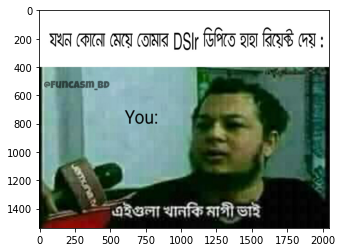

In [ ]:
img_path = os.path.join("/content/Memes/Memes/Bangla Thug Life (1).jpg")
img = plt.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Image  and labels preprocessing 

In [ ]:
# Trainset
X_image_train = []
y_train =[]
base_path = "/content/Memes/Memes"
for frame, captions,labels in dataset.values:
  img_path = os.path.join(base_path, frame)
  img = load_img(img_path, target_size = (180, 180))
  X_image_train.append(img)
  y_train.append(labels)



In [ ]:
X_image_train = np.array([np.array(val) for val in X_image_train])
y_train       = np.array(y_train)

In [ ]:
X_image_test = []
base_path = "/content/Memes/Memes"
for id, frame, captions in testset.values:
  img_path = os.path.join(base_path, frame)
  img = load_img(img_path, target_size = (180, 180))
  X_image_test.append(img)
  


In [ ]:
X_image_test = np.array([np.array(val) for val in X_image_test])

In [ ]:
type(X_image_test)

numpy.ndarray

In [ ]:
type(X_image_train)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
print(f"train set length {len(X_image_train)}")
print(f"test set length {len(X_image_test)}")

train set length 3495
test set length 873


# Text Preprocessing

In [ ]:
number_of_classes = len(dataset['Label'].unique())
number_of_classes

3

In [ ]:
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  3495


In [ ]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Captions.apply(cleaning)  
testset['cleaned'] = testset.Captions.apply(cleaning)

In [ ]:
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

In [ ]:
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

9382


In [ ]:
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
যদি 55
জেমস 5
বন্ড 3
পরীক্ষা 30
দিতো 3
আর 363
পাশ 16
করতো 3
আপনার 96
নাম 65

Words ===> Documents
আপনার 83
পরীক্ষা 19
জেমস 3
পাশ 15
যদি 52
করতো 3
কি 394
বন্ড 1
আর 328
নাম 57

Words ===> Index
না 1
আমি 2
আমার 3
কি 4
যখন 5
আর 6
করে 7
তো 8
পর 9
এর 10
Total Number of Documents:  3495


In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1

Text(0.5, 1.0, 'Length-Frequency Distribution')

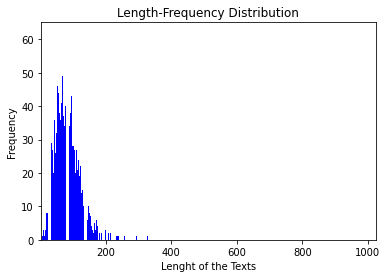

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

In [ ]:
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

In [ ]:
test_sequences = tokenizer.texts_to_sequences(testset['cleaned'])

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 9382 unique tokens.


In [ ]:
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
train_corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 60)
## We get the maxlen value from the Length frequency distribution

print(train_corpus[0])

Maximum Text length 111
[  87 1222 1878  185 1879    6  380 1880   44   74    4 1878 1222 1878
   44 1881    4 4037  164  251  164    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [ ]:
test_corpus = keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= 60)

# Text train and test set

In [ ]:
X_text_train, y_train = train_corpus, dataset["Label"]
X_text_test = test_corpus

In [ ]:
print("Training Size: ",X_text_train.shape)
print("Test Size: ",X_text_test.shape)

Training Size:  (3495, 60)
Test Size:  (873, 60)


# BiLSTM + CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
keras.backend.clear_session()

max_length = 60
embedding_dim = 32
number_of_classes = len(dataset['Label'].unique())
lc_text_inputs = Input(shape=(max_length,))
lc_embedding_layer = Embedding(max_words,embedding_dim, mask_zero = True)(lc_text_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
LSTM_Layer_2 = Bidirectional(LSTM(16,return_sequences=True))(LSTM_Layer_1)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer_2)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_conv2 = Conv1D(64,2,activation='relu')(lc_pool1)
lc_pool2 = MaxPooling1D(2)(lc_conv2)
lc_flat = Flatten()(lc_pool2)
lc_dropout = layers.Dropout(0.2)(lc_flat)
outputs = Dense(3, activation='softmax')(lc_dropout)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs= outputs)

In [ ]:
# cnn_lstm_model.compile(
#     loss = "sparse_categorical_crossentropy",
#     optimizer = "adam",
#     metrics = ["accuracy"]
# )

In [ ]:
# history = cnn_lstm_model.fit( X_text_train,
#                     y_train, 
#                     epochs=20, 
#                     batch_size=32,
#                     validation_split =0.2,
#                     )

# Pretrain Image Model

In [ ]:
conv_base = tf.keras.applications.xception.Xception(
    weights = "imagenet",
    include_top = False,
    classifier_activation='softmax',
    input_shape = (180,180,3)

)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
) 

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-6]:
  layer.trainable = False

In [ ]:
keras.backend.clear_session()
inputs = keras.Input(shape = (180,180, 3), name = "image_input")
x = data_augmentation(inputs)
x = keras.applications.xception.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten(name ="image_flatten")(x)
x = layers.Dense(256,activation = "relu", name ="image_dense1")(x)
x = layers.Dropout(0.4, name = "image_dropout")(x)
outputs = layers.Dense(3, activation = "softmax", name = "image_dense2")(x)
image_model = keras.Model(inputs, outputs)

In [ ]:
# image_model.compile(
#     loss = "sparse_categorical_crossentropy",
#     optimizer = "adam",
#     metrics = ["accuracy"]
# )

In [ ]:
# history = image_model.fit( X_image_train,
#                     y_train, 
#                     epochs=20, 
#                     batch_size=32,
#                     validation_split =0.2,
#                     )

# Merge Model

In [ ]:
keras.backend.clear_session()
concatenated = layers.concatenate([image_model.output, cnn_lstm_model.output])
combined_dense1 = layers.Dense(128, activation = "relu", name = "combined_dense1")(concatenated)
combined_dropout = layers.Dropout(0.4, name = "combined_dropout")(combined_dense1)
outputs = layers.Dense(3, activation = "softmax", name = "output_dense_layer")(combined_dropout)
model = keras.Model([inputs, lc_text_inputs], outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 60, 32)       3200000     ['input_1[0][0]']                
                                                                                                  
 image_input (InputLayer)       [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 bidirectional (Bidirectional)  (None, 60, 64)       16640       ['embedding[0][0]']          

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "mymodel.h5",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit([X_image_train, X_text_train],
                    y_train, 
                    epochs=25, 
                    batch_size=32,
                    validation_split =0.2,
                    callbacks = callbacks
                    )

Epoch 1/25


88/88 [==============================] - 136s 1s/step - loss: 0.8765 - accuracy: 0.6223 - val_loss: 0.8140 - val_accuracy: 0.6438
Epoch 2/25
88/88 [==============================] - 90s 1s/step - loss: 0.7709 - accuracy: 0.6727 - val_loss: 0.7726 - val_accuracy: 0.6824
Epoch 3/25
88/88 [==============================] - 80s 907ms/step - loss: 0.5994 - accuracy: 0.8072 - val_loss: 0.8383 - val_accuracy: 0.6466
Epoch 4/25
88/88 [==============================] - 82s 930ms/step - loss: 0.4787 - accuracy: 0.8566 - val_loss: 0.9639 - val_accuracy: 0.6423
Epoch 5/25
88/88 [==============================] - 79s 895ms/step - loss: 0.3993 - accuracy: 0.8834 - val_loss: 1.0447 - val_accuracy: 0.6266
Epoch 6/25
88/88 [==============================] - 81s 912ms/step - loss: 0.3578 - accuracy: 0.8991 - val_loss: 1.1283 - val_accuracy: 0.6280
Epoch 7/25
88/88 [==============================] - 82s 927ms/step - loss: 0.3305 - accuracy: 0.9084 - val_loss: 1.1405 - val_accuracy: 0.6295
Epoch 8/25
88/8

In [ ]:
test_model =  keras.models.load_model("mymodel.h5")

In [ ]:
y_pred = test_model.predict([X_image_test, X_text_test])
y_pred = tf.argmax(y_pred,axis = 1)
y_pred

28/28 [==============================] - 10s 167ms/step


<tf.Tensor: shape=(873,), dtype=int64, numpy=
array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
     

In [ ]:
pred_value = np.array(y_pred)
y_pred = pd.DataFrame(pred_value, columns=['Label'])
id = pd.DataFrame(testset['Id'])
submit_df = pd.concat([id, y_pred], axis=1).set_index('Id')
submit_df.to_csv('submit_data.csv')